In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from dataloader import DataLoader
from PIL import Image
from _graphutils import GraphUtils
from _plotutils import PlotUtils
from kernels.wlkernel import WLKernel
from kernels.shortestpathkernel import ShortestPathKernel
from kernels.randomwalkkernel import RandomWalkKernel
from kernels.labelhasher import LabelHasher

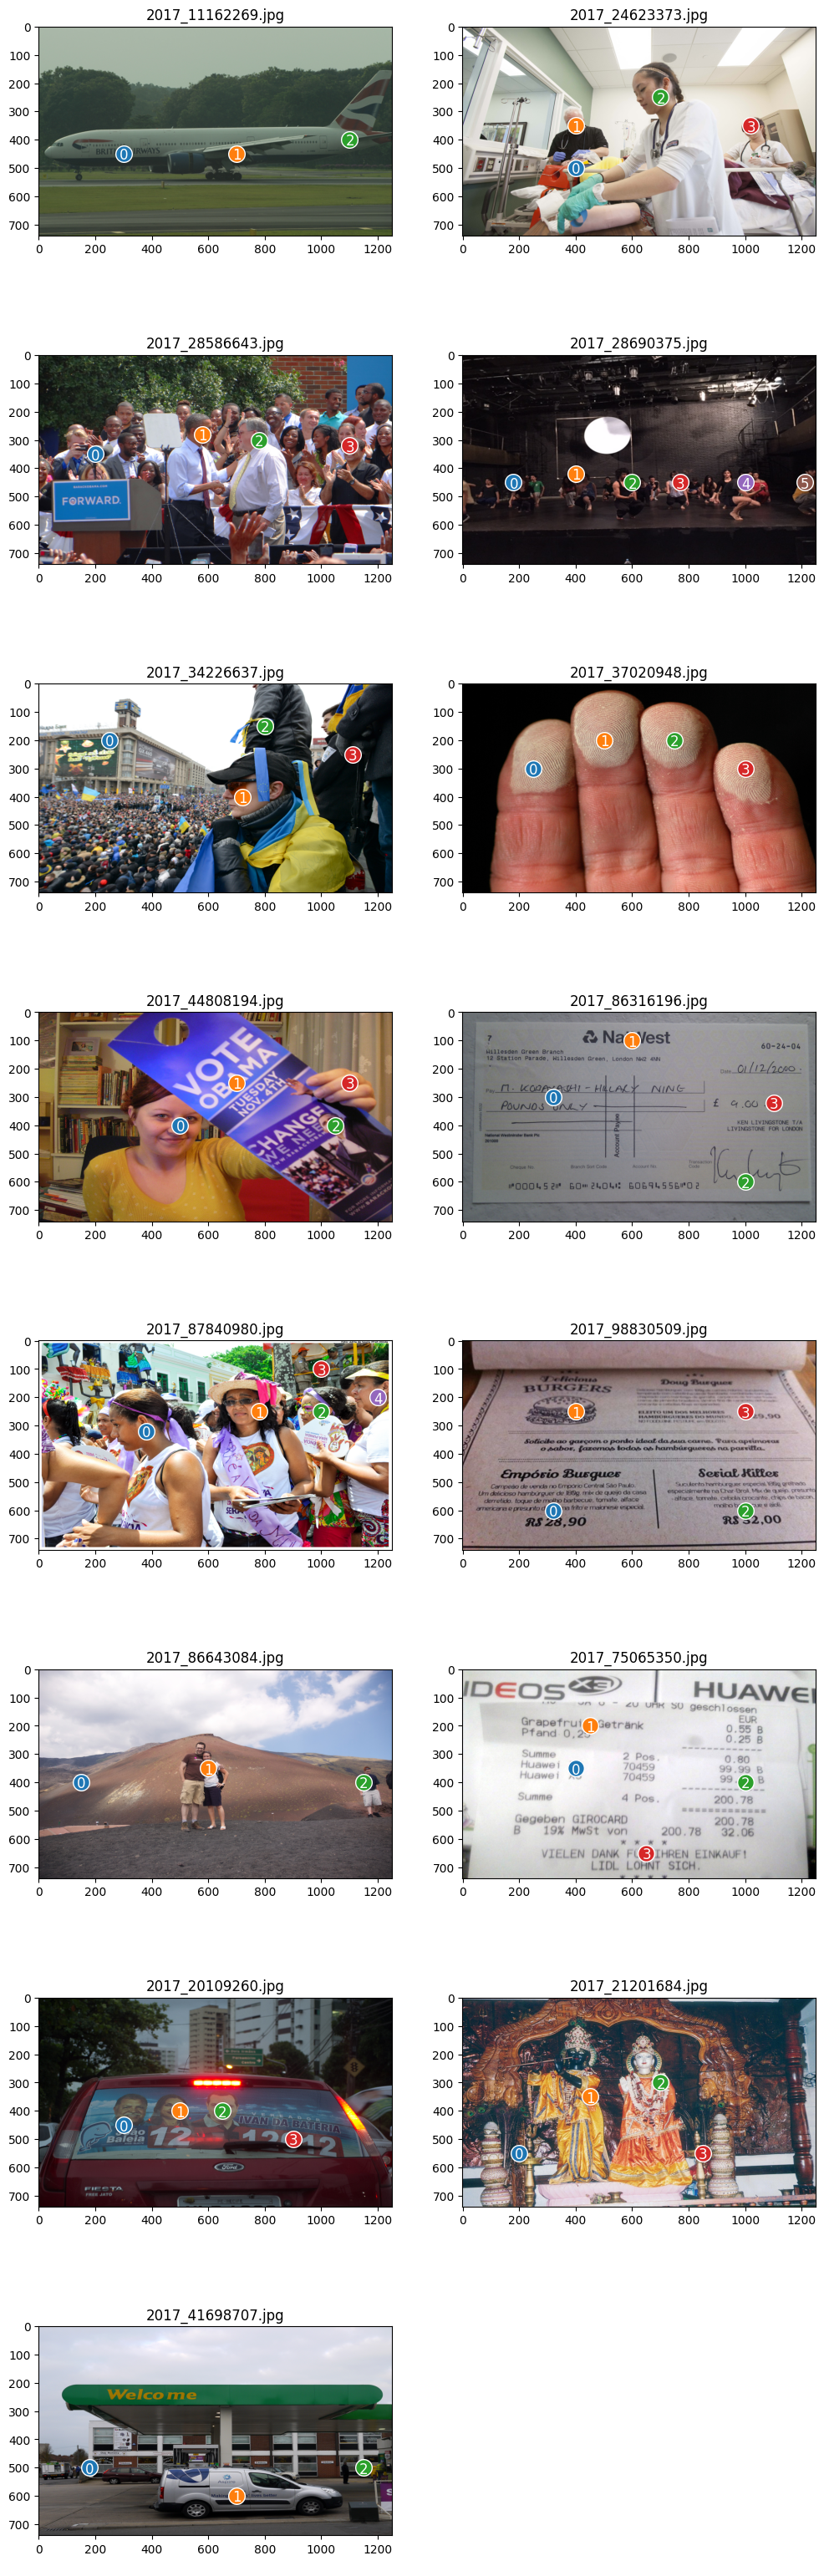

In [48]:
dl = DataLoader("../eyelink_data")
imgs = dl.get_annotated_images()
fig, ax = PlotUtils.wrap_subplots(len(imgs), 2)

for i, img in enumerate(imgs):
    img_file = dl.get_image(img)
    aois = dl.get_image_aois(img)
    PlotUtils.plot_aois(aois=aois, title=img, image=img_file, ax=ax[i])

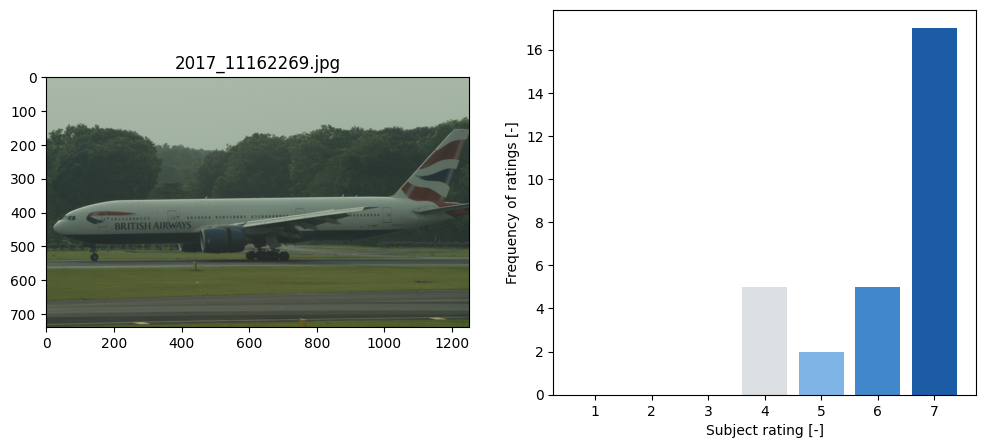

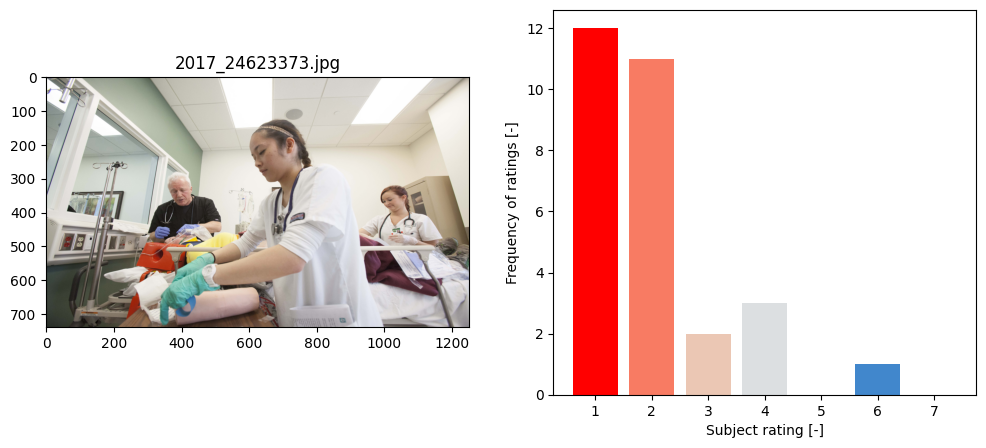

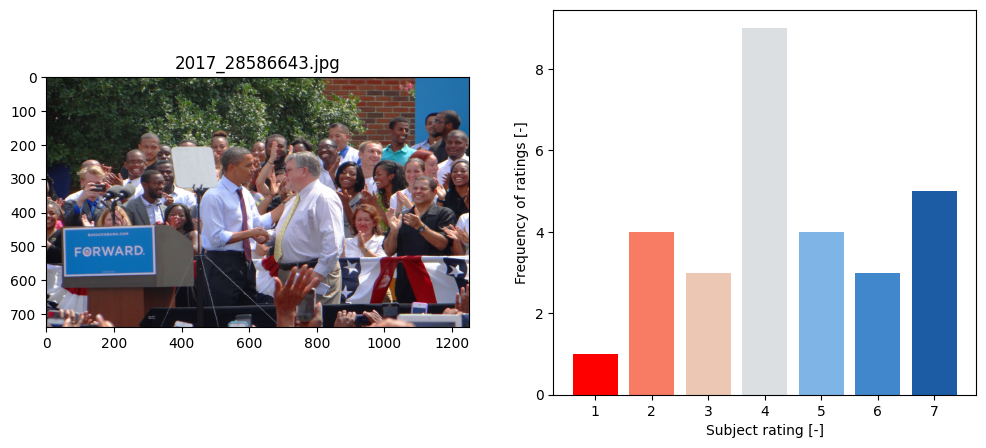

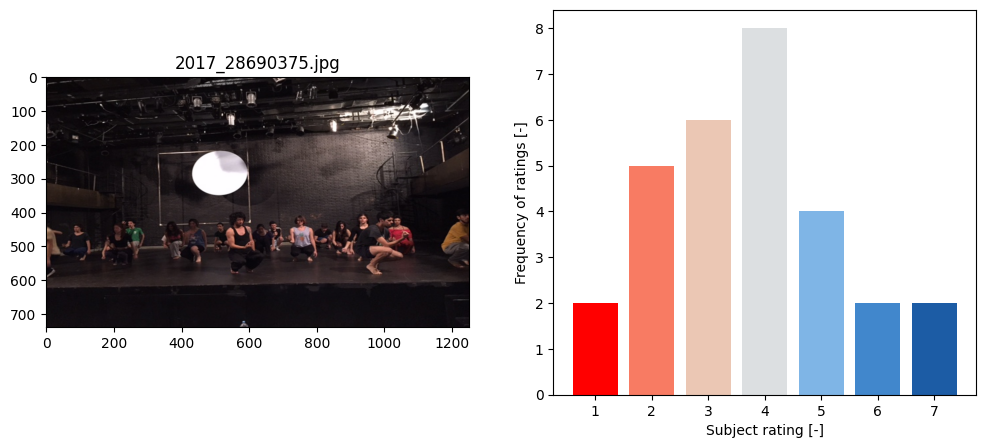

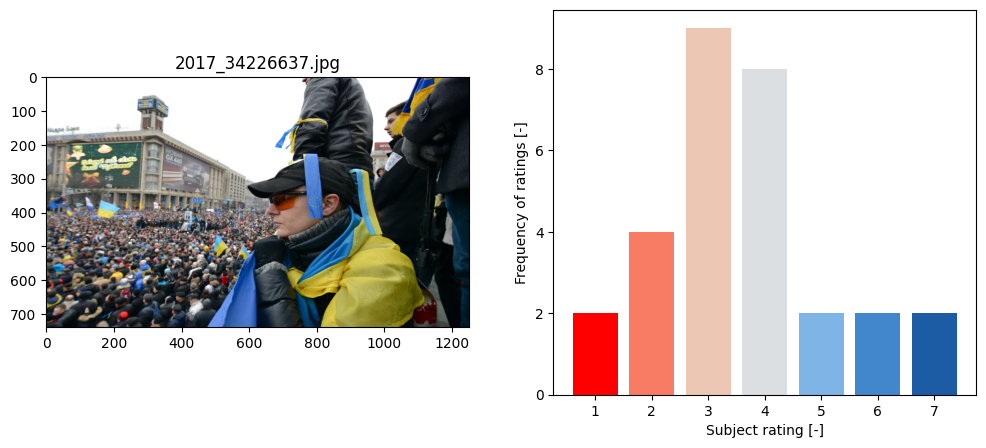

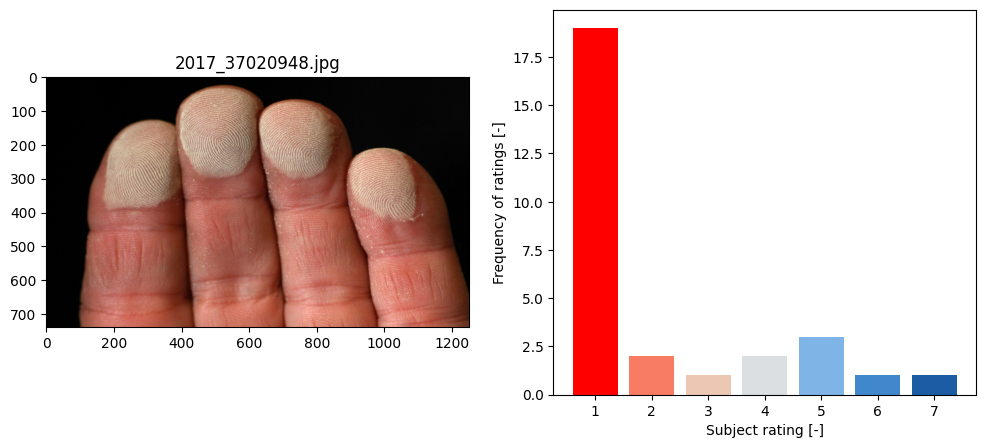

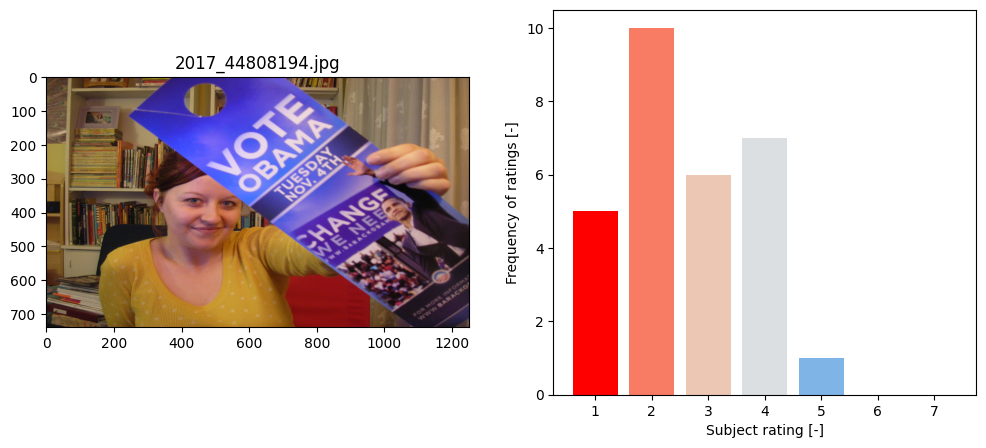

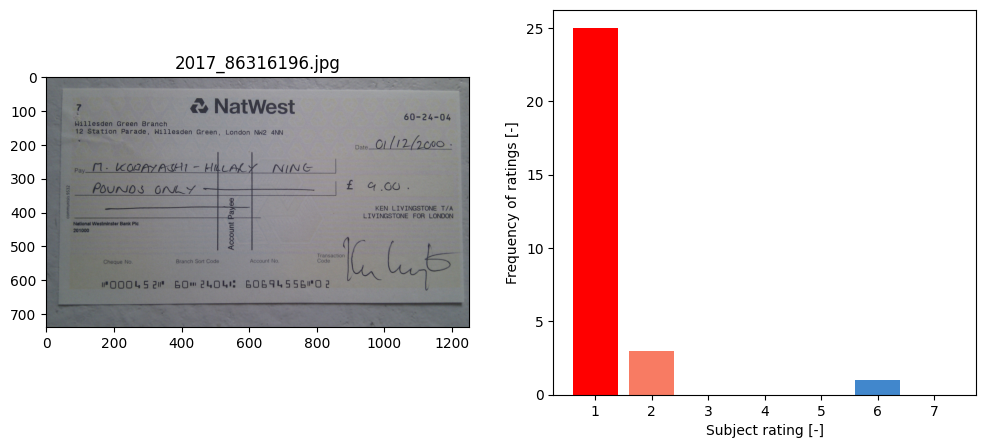

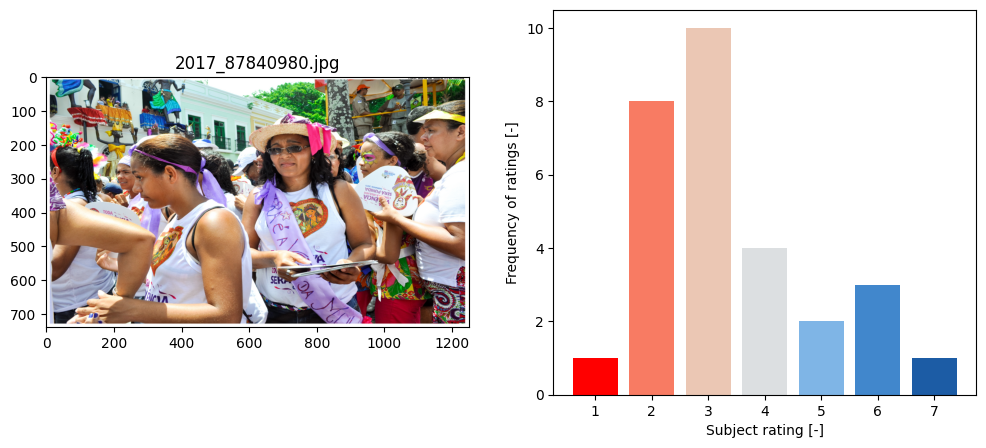

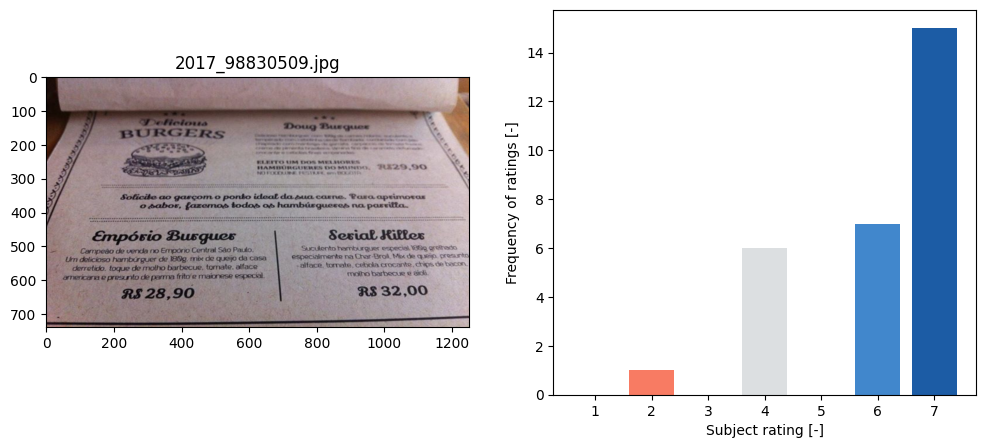

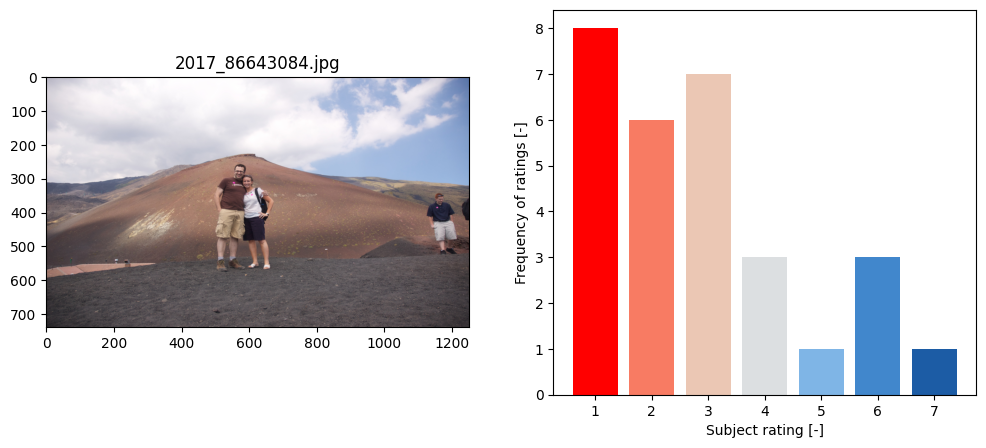

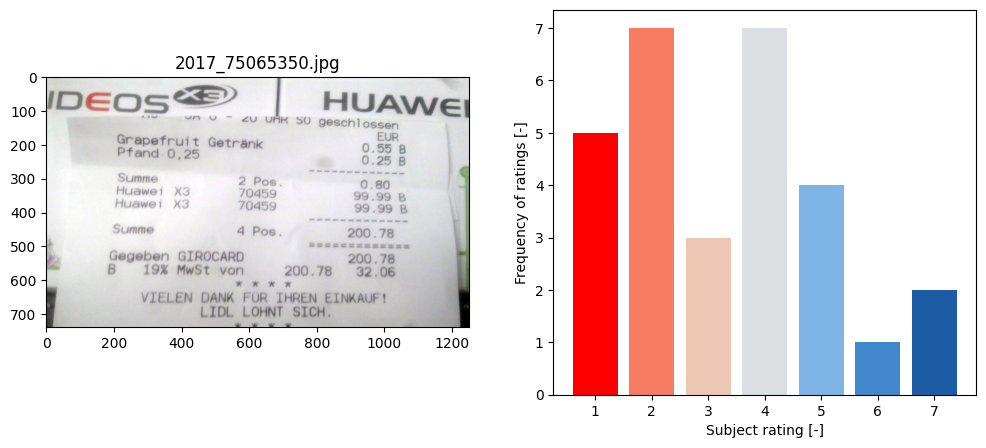

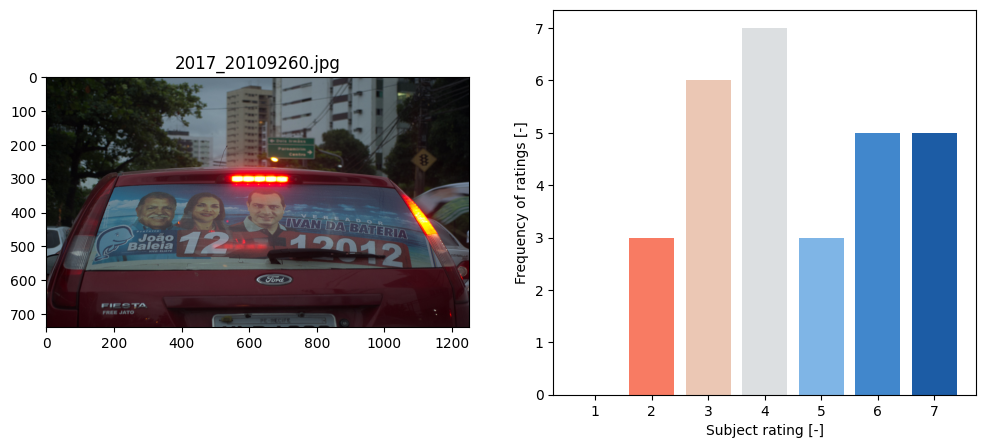

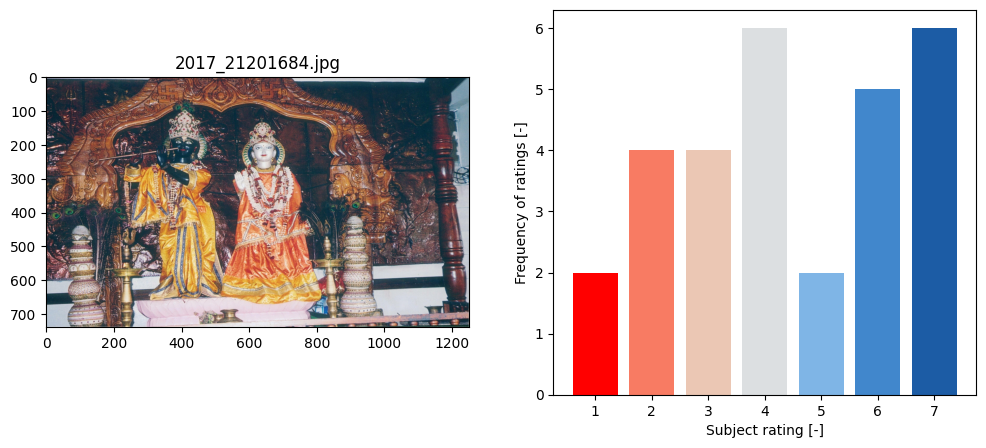

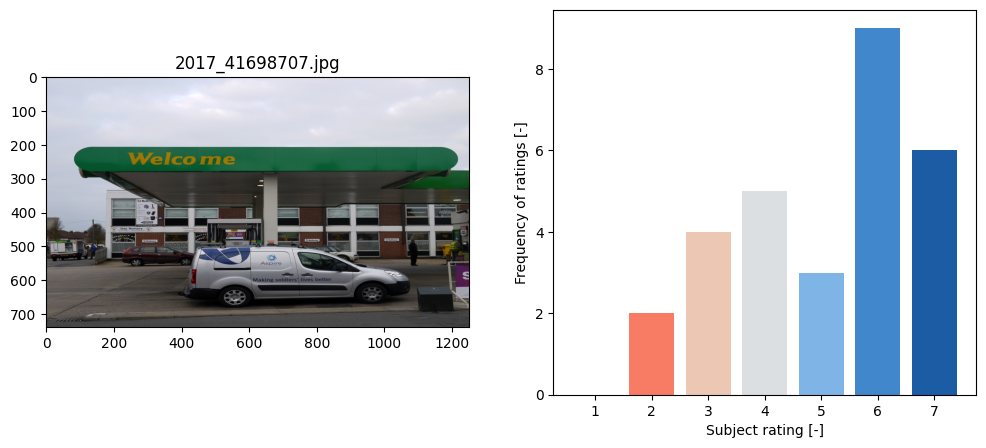

In [49]:
from collections import Counter


for i, img in enumerate(imgs):
    img_file = dl.get_image(img)
    ratings = dl.get_image_ratings(img)
    counts = Counter(ratings.values())

    all_ratings = PlotUtils.answer_colors.keys()
    colors = [PlotUtils.answer_colors[rating] for rating in all_ratings]

    fig, axs = PlotUtils.wrap_subplots(2, 2)
    axs[0].imshow(img_file)
    axs[0].set(title=img)
    axs[1].bar(x=all_ratings, height=[counts.get(rating, 0) for rating in all_ratings], color=colors)
    axs[1].set(xlabel="Subject rating [-]", ylabel="Frequency of ratings [-]")
